# 0.2 Exploratory Data Analysis

## Introduction <a id='introduction'></a>

## Table of Contents
* Introduction
* 1. Census
* Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To modules make datasets to perform analysis on
import importlib
import sys
# setting path
sys.path.append('..')
# importing
from src.data import make_datasets
importlib.reload(make_datasets);

## Census

In [3]:
make_datasets.make_tall_census('../data/raw/census', '../data/interim')

Make sure that all the census DataFrames can be combined into a single tall dataframe

In [25]:
census_10 = pd.read_csv('../data/interim/census/saipe2010.csv', index_col=0)
census_10

,district_name,est_child_poverty,est_total_child,est_total_pop,year
0,Cheyenne County School District RE-5,39,229,1350,2010
1,Yuma School District 1,179,977,5017,2010
2,Wray School District RD-2,103,727,3958,2010
3,Idalia School District RJ-3,12,92,502,2010
4,Liberty School District J-4,7,69,507,2010
...,...,...,...,...,...
173,Wiggins School District RE-50J,66,533,2526,2010
174,Wiley School District RE-13-JT,39,193,965,2010
175,Windsor School District RE-4,353,4595,21633,2010
176,Woodland Park School District RE-2,351,3124,18629,2010


In [26]:
census_11 = pd.read_csv('../data/interim/census/saipe2011.csv', index_col=0)
census_11

,district_name,est_child_poverty,est_total_child,est_total_pop,year
0,Cheyenne County School District RE-5,47,243,1383,2011
1,Yuma School District 1,203,988,5046,2011
2,Wray School District RD-2,123,736,3980,2011
3,Idalia School District RJ-3,14,93,505,2011
4,Liberty School District J-4,7,70,509,2011
...,...,...,...,...,...
173,Wiggins School District RE-50J,66,531,2528,2011
174,Wiley School District RE-13-JT,36,194,959,2011
175,Windsor School District RE-4,369,4646,22005,2011
176,Woodland Park School District RE-2,382,3081,18551,2011


In [27]:
census_12 = pd.read_csv('../data/interim/census/saipe2012.csv', index_col=0)
census_12

,district_name,est_child_poverty,est_total_child,est_total_pop,year
0,Cheyenne County School District RE-5,27,243,1382,2012
1,Yuma School District 1,197,987,5055,2012
2,Wray School District RD-2,126,734,3988,2012
3,Idalia School District RJ-3,15,93,506,2012
4,Liberty School District J-4,9,70,509,2012
...,...,...,...,...,...
173,Wiggins School District RE-50J,80,518,2556,2012
174,Wiley School District RE-13-JT,33,192,937,2012
175,Windsor School District RE-4,362,4722,22434,2012
176,Woodland Park School District RE-2,416,3042,18577,2012


In [28]:
sum(census_10['district_name'] != census_11['district_name'])

0

In [29]:
sum(census_10['district_name'] != census_12['district_name'])

0

It seems that the natural order that the district name appear in is identical. We can safely make a tall dataframe with each year to perform data analysis well

In [3]:
tall_census = pd.read_csv('../data/interim/saipe_tall.csv', index_col=0)
tall_census.head()

,district_name,est_child_poverty,est_total_child,est_total_pop,year
0,Cheyenne County School District RE-5,39,229,1350,2010
1,Yuma School District 1,179,977,5017,2010
2,Wray School District RD-2,103,727,3958,2010
3,Idalia School District RJ-3,12,92,502,2010
4,Liberty School District J-4,7,69,507,2010


In [16]:
# Making sure that every column has no null values and they are the right type
tall_census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 0 to 177
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   district_name      534 non-null    object
 1   est_child_poverty  534 non-null    int64 
 2   est_total_child    534 non-null    int64 
 3   est_total_pop      534 non-null    int64 
 4   year               534 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 25.0+ KB


In [17]:
tall_census.describe()

,est_child_poverty,est_total_child,est_total_pop,year
count,534.000000,534.000000,534.000000,534.000000
mean,784.011236,4992.402622,28751.777154,2011.000000
std,2300.629097,12999.292561,77715.627682,0.817262
min,5.000000,32.000000,167.000000,2010.000000
25%,39.250000,205.250000,1253.750000,2010.000000
50%,115.000000,630.000000,3964.000000,2011.000000
75%,384.750000,2573.750000,15323.000000,2012.000000
max,26358.000000,90920.000000,634265.000000,2012.000000


In [29]:
# Statistics across all school district for each year
census_year_group = tall_census.groupby('year')
census_year_group.describe().T

year                              2010           2011           2012
est_child_poverty count     178.000000     178.000000     178.000000
                  mean      738.685393     778.831461     834.516854
                  std      2194.398468    2199.170762    2506.410683
                  min         5.000000       6.000000       5.000000
                  25%        39.500000      40.500000      39.250000
                  50%       104.500000     107.000000     123.500000
                  75%       367.250000     395.500000     399.250000
                  max     22978.000000   21750.000000   26358.000000
est_total_child   count     178.000000     178.000000     178.000000
                  mean     4967.522472    4988.393258    5021.292135
                  std     12897.437708   13017.594732   13154.887605
                  min        34.000000      32.000000      32.000000
                  25%       216.250000     205.750000     205.250000
                  50%       630.500000     613.000000     604.000000
                  75%      2590.750000    2542.000000    2512.750000
                  max     88970.000000   88725.000000   90920.000000
est_total_pop     count     178.000000     178.000000     178.000000
                  mean    28365.567416   28746.044944   29143.719101
                  std     76512.375323   77845.829782   79202.149312
                  min       172.000000     168.000000     167.000000
                  25%      1257.750000    1253.750000    1281.500000
                  50%      3944.000000    3953.000000    3979.000000
                  75%     15027.250000   15152.000000   15303.000000
                  max    604414.000000  619968.000000  634265.000000

In [5]:
# Find the percent of children in poverty
# As well as the ratio of children to the overall population
tall_census['child_pov_ratio'] = tall_census['est_child_poverty'] / tall_census['est_total_child']
tall_census['child_adult_ratio'] = tall_census['est_total_child'] / tall_census['est_total_pop']
tall_census.head()

,district_name,est_child_poverty,est_total_child,est_total_pop,year,child_pov_ratio,child_adult_ratio
0,Cheyenne County School District RE-5,39,229,1350,2010,0.170306,0.169630
1,Yuma School District 1,179,977,5017,2010,0.183214,0.194738
2,Wray School District RD-2,103,727,3958,2010,0.141678,0.183679
3,Idalia School District RJ-3,12,92,502,2010,0.130435,0.183267
4,Liberty School District J-4,7,69,507,2010,0.101449,0.136095


<AxesSubplot: xlabel='year', ylabel='child_pov_ratio'>

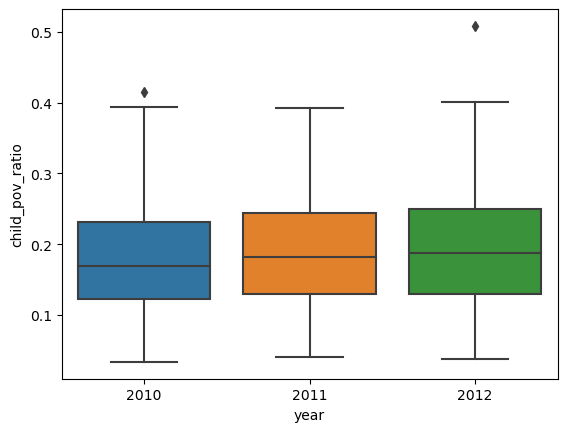

In [32]:
# Show the change in poverty over time
sns.boxplot(data=tall_census, x='year', y='child_pov_ratio')

<AxesSubplot: xlabel='child_pov_ratio', ylabel='Density'>

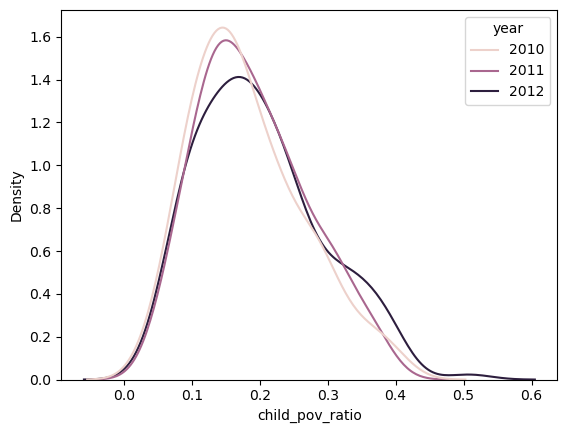

In [137]:
sns.kdeplot(data=tall_census, x='child_pov_ratio', hue='year')

It looks like it might be increasing though not by much. We will perform a hypothesis test to determine if the change across these years is significant

In [35]:
# The highest child poverty ratio's for each school district across every year
tall_census.sort_values('child_pov_ratio', ascending=False).head(10)

,district_name,est_child_poverty,est_total_child,est_total_pop,year,child_pov_ratio,child_adult_ratio
122,Moffat Consolidated School District 2,94,185,1622,2012,0.508108,0.114057
8,Aguilar Reorganized School District 6,68,164,1166,2010,0.414634,0.140652
33,Center School District 26-JT,280,698,3388,2012,0.401146,0.206021
150,Sheridan School District 2,578,1457,8358,2012,0.396706,0.174324
167,Huerfano School District RE-1,257,650,5310,2012,0.395385,0.122411
47,Del Norte School District C-7,262,665,4119,2012,0.393985,0.161447
89,Holly School District RE-3,101,257,1393,2010,0.392996,0.184494
33,Center School District 26-JT,260,663,3353,2011,0.392157,0.197733
142,Mountain Valley School District RE-1,64,165,1410,2012,0.387879,0.117021
144,Centennial School District R-1,112,290,1892,2010,0.386207,0.153277


Similar to the boxplot, in the top 10 highest child poverty ratios, we see 2012 appearing most frequently. Another interesting observation is that the populations of each of the poorest districts are all very small. Let's see if this is true across the average of all years

In [6]:
# The highest average poverty ratio's for each district
tall_census.groupby('district_name').mean().sort_values('child_pov_ratio', ascending=False).drop('year', axis=1).head(10)

,est_child_poverty,est_total_child,est_total_pop,child_pov_ratio,child_adult_ratio
district_name,,,,,
Moffat Consolidated School District 2,75.666667,181.000000,1600.333333,0.417124,0.113115
Center School District 26-JT,259.666667,684.666667,3349.333333,0.379393,0.204437
Centennial School District R-1,108.333333,290.000000,1928.000000,0.373610,0.150415
Aguilar Reorganized School District 6,58.333333,158.333333,1144.000000,0.367704,0.138380
South Conejos School District RE-10,132.666667,363.666667,2249.000000,0.365080,0.161700
Huerfano School District RE-1,246.333333,686.666667,5309.000000,0.360443,0.129297
Mountain Valley School District RE-1,57.333333,161.000000,1390.666667,0.356168,0.115786
Holly School District RE-3,91.666667,258.666667,1387.666667,0.354572,0.186408
Crowley County School District RE-1-J,183.000000,528.000000,5473.000000,0.348587,0.096415


The same idea holds as above. By the looks of it, there doesn't seem to be any correlation between the number of children to adults and poverty. Lets, see the correlation between the child poverty ratio and all other variables

C:\Users\caeley\AppData\Local\Temp\ipykernel_19136\3907696583.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tall_census.corr(), annot=True);


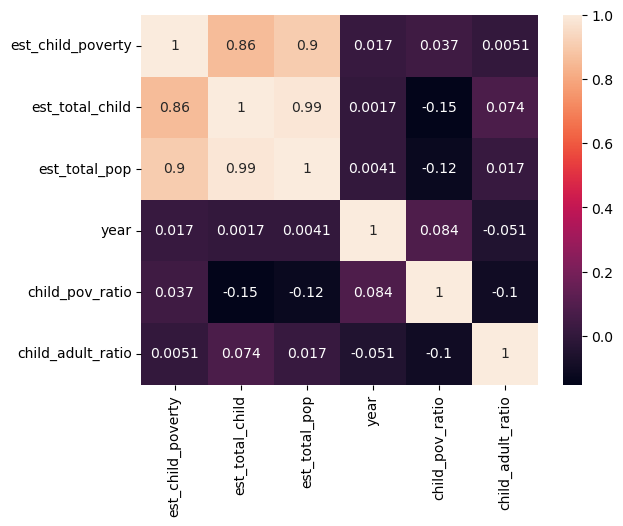

In [16]:
sns.heatmap(tall_census.corr(), annot=True);

All the correlations seem pretty weak. The strongest of which indicates that in higher populated areas, poverty ratios decrease. Interestingly, there is almost no correlation between the higher populated areas and the ratio of children to adults. This goes against our expectation that more single people live in larger cities 

## Expenditures

In [17]:
make_datasets.make_tall_expenditures('../data/raw/expenditures', '../data/interim')

Similar to the census data, lets make sure that the expenditures can be stacked well. We will find out later if the expenditures and the census data can be combined well

In [36]:
expenditures_2010 = pd.read_csv('../data/interim/expenditures/expenditures2010.csv', index_col=0)
expenditures_2010

,district_name,county,instruction_total,support_total,community_total,other_total,sum_total,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil
0,MAPLETON 1,ADAMS,39962942,23760636,237704,5474579,69435862,5556,3303,33,761,9653
1,ADAMS 12 FIVE STAR,ADAMS,220263102,130356958,943009,83867989,435431057,5482,3244,23,2087,10837
2,ADAMS COUNTY 14,ADAMS,34792431,34598159,703485,7862015,77956091,4956,4928,100,1120,11104
3,BRIGHTON 27J,ADAMS,62557927,50921503,219987,18440305,132139723,4397,3579,15,1296,9287
4,BENNETT 29J,ADAMS,4853879,3540284,0,1004359,9398521,4537,3309,0,939,8784
...,...,...,...,...,...,...,...,...,...,...,...,...
174,YUMA 1,YUMA,4431710,3277849,0,1358007,9067566,5596,4139,0,1715,11450
175,WRAY RD-2,YUMA,3532489,2746335,0,800124,7078947,5378,4181,0,1218,10776
176,IDALIA RJ-3,YUMA,1154510,810850,0,25002,1990362,8539,5997,0,185,14722
177,LIBERTY J-4,YUMA,926415,647462,0,25386,1599262,11068,7736,0,303,19107


In [35]:
expenditures_2011 = pd.read_csv('../data/interim/expenditures/expenditures2011.csv', index_col=0)
expenditures_2011

,district_name,county,instruction_total,support_total,community_total,other_total,sum_total,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil
0,MAPLETON 1,ADAMS,38157232,24772389,1133114,47915629,111978365,5211.0,3383.0,155.0,6544.0,15293.0
1,ADAMS 12 FIVE STAR,ADAMS,222647754,122690063,1234485,204125589,550697892,5417.0,2985.0,30.0,4966.0,13397.0
2,ADAMS COUNTY 14,ADAMS,35356243,37275630,795722,7400225,80827821,5233.0,5517.0,118.0,1095.0,11963.0
3,BRIGHTON 27J,ADAMS,62834937,49692282,261089,61259467,174047775,4239.0,3353.0,18.0,4133.0,11743.0
4,BENNETT 29J,ADAMS,4471446,3839480,0,8277945,16588870,4268.0,3665.0,0.0,7902.0,15835.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,WRAY RD-2,YUMA,3735725,2942154,0,994744,7672623,5572.0,4389.0,0.0,1484.0,11445.0
176,IDALIA RJ-3,YUMA,1115415,829568,0,1113957,3058941,8124.0,6042.0,0.0,8113.0,22279.0
177,LIBERTY J-4,YUMA,1033616,704354,0,0,1737970,12605.0,8590.0,0.0,0.0,21195.0
178,CHARTER SCHOOL INSTITUTE,NaN,35842798,29870470,34733,11932555,77680555,3539.0,2950.0,3.0,1178.0,7671.0


There is one more row in 2011 from 2010. Lets find out what it is

In [45]:
district_names_2011 = set(expenditures_2011['district_name'])
district_names_2010 = set(expenditures_2010['district_name'])
district_names_2011.difference(district_names_2010)

{'GLOBAL VILLAGE CHARTER COLLABORATIVE'}

Let's compare this with the 2012

In [47]:
expenditures_2012 = pd.read_csv('../data/interim/expenditures/expenditures2012.csv', index_col=0)
expenditures_2012

,district_name,county,instruction_total,support_total,community_total,other_total,sum_total,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil
0,MAPLETON 1,ADAMS,38592373,25709054,779878,4153285,69234590,5081.0,3385.0,103.0,547.0,9115.0
1,ADAMS 12 FIVE STAR,ADAMS,221051769,120585070,1335918,51372445,394345203,5347.0,2917.0,32.0,1243.0,9538.0
2,ADAMS COUNTY 14,ADAMS,38196626,36456267,413091,77970868,153036852,5516.0,5265.0,60.0,11260.0,22100.0
3,BRIGHTON 27J,ADAMS,67423272,52627926,247509,24647115,144945822,4392.0,3428.0,16.0,1605.0,9441.0
4,BENNETT 29J,ADAMS,4894710,3252791,0,988729,9136230,4766.0,3167.0,0.0,963.0,8895.0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,WRAY RD-2,YUMA,3933428,2857350,0,6011673,12802451,5749.0,4176.0,0.0,8786.0,18712.0
176,IDALIA RJ-3,YUMA,1058571,957184,0,288434,2304189,6786.0,6136.0,0.0,1849.0,14770.0
177,LIBERTY J-4,YUMA,853026,707357,0,0,1560383,10978.0,9104.0,0.0,0.0,20082.0
178,CHARTER SCHOOL INSTITUTE,NaN,40561158,40549832,254978,6088775,87454743,3593.0,3592.0,23.0,539.0,7746.0


In [48]:
district_names_2012 = set(expenditures_2012['district_name'])
district_names_2012.difference(district_names_2010)

{'GLOBAL VILLAGE CHARTER COLLABORATIVE'}

The same is true Global Village Charter Collaborative at index 179 is found in 2011 and 2012 but not in 2010. Otherwise, they have the same information. Since this district is missing almost every value in 2011 and 2012, we will drop it and create a tall dataframe with every year

In [50]:
expenditures_2011 = expenditures_2011.drop(179)
expenditures_2012 = expenditures_2012.drop(179)
tall_expenditures = make_datasets.make_tall((expenditures_2010, expenditures_2011, expenditures_2012), (2010, 2011, 2012), 'year')
tall_expenditures.head()

,district_name,county,instruction_total,support_total,community_total,other_total,sum_total,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil,year
0,MAPLETON 1,ADAMS,39962942,23760636,237704,5474579,69435862,5556.0,3303.0,33,761.0,9653.0,2010
1,ADAMS 12 FIVE STAR,ADAMS,220263102,130356958,943009,83867989,435431057,5482.0,3244.0,23,2087.0,10837.0,2010
2,ADAMS COUNTY 14,ADAMS,34792431,34598159,703485,7862015,77956091,4956.0,4928.0,100,1120.0,11104.0,2010
3,BRIGHTON 27J,ADAMS,62557927,50921503,219987,18440305,132139723,4397.0,3579.0,15,1296.0,9287.0,2010
4,BENNETT 29J,ADAMS,4853879,3540284,0,1004359,9398521,4537.0,3309.0,0,939.0,8784.0,2010


In [55]:
tall_expenditures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 178
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   district_name          537 non-null    object 
 1   county                 534 non-null    object 
 2   instruction_total      537 non-null    int64  
 3   support_total          537 non-null    int64  
 4   community_total        537 non-null    int64  
 5   other_total            537 non-null    int64  
 6   sum_total              537 non-null    int64  
 7   instruction_per_pupil  537 non-null    float64
 8   support_per_pupil      537 non-null    float64
 9   community_per_pupil    537 non-null    object 
 10  other_per_pupil        537 non-null    float64
 11  sum_per_pupil          537 non-null    float64
 12  year                   537 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 58.7+ KB


Looks like there is an issue with the community_per_pupil column because it is not a float data type

In [100]:
# A function that returns True when an entry cannot be converted to a float
@np.vectorize
def is_not_float(entry):
    try:
        float(entry)
        return False
    except:
        return True

In [101]:
tall_expenditures.loc[is_not_float(tall_expenditures['community_per_pupil'])]

,district_name,county,instruction_total,support_total,community_total,other_total,sum_total,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil,year


Luckily, there's only one entry that has an issue. We will impute this value by taking the average of 2011 and 2012

In [86]:
# String variables to make our lives easier
com = 'community_per_pupil'
stras = 'STRASBURG 31J'

# Truth value series to insert later
strasburg_entries = tall_expenditures['district_name'] == 'STRASBURG 31J'
entries_2010 = tall_expenditures['year'] == 2010

# The two values to compute the mean from
com_val_2011 = expenditures_2011[com][expenditures_2011['district_name'] == stras]
com_val_2012 = expenditures_2012[com][expenditures_2012['district_name'] == stras]

# Setting the value
tall_expenditures.loc[(strasburg_entries) & (entries_2010), com] = (com_val_2011 + com_val_2012.values) / 2

In [88]:
# Convert the data type
tall_expenditures['community_per_pupil'] = tall_expenditures['community_per_pupil'].astype('float64')

In [90]:
# Check to make sure it was successful
tall_expenditures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 0 to 178
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   district_name          537 non-null    object 
 1   county                 534 non-null    object 
 2   instruction_total      537 non-null    int64  
 3   support_total          537 non-null    int64  
 4   community_total        537 non-null    int64  
 5   other_total            537 non-null    int64  
 6   sum_total              537 non-null    int64  
 7   instruction_per_pupil  537 non-null    float64
 8   support_per_pupil      537 non-null    float64
 9   community_per_pupil    537 non-null    float64
 10  other_per_pupil        537 non-null    float64
 11  sum_per_pupil          537 non-null    float64
 12  year                   537 non-null    int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 74.9+ KB


In [93]:
per_pupil_data = tall_expenditures.drop(['instruction_total', 'support_total', 'community_total', 'other_total', 'sum_total'], axis=1)
total_data = tall_expenditures.drop(['instruction_per_pupil', 'support_per_pupil', 'community_per_pupil', 'other_per_pupil', 'sum_per_pupil'], axis=1)


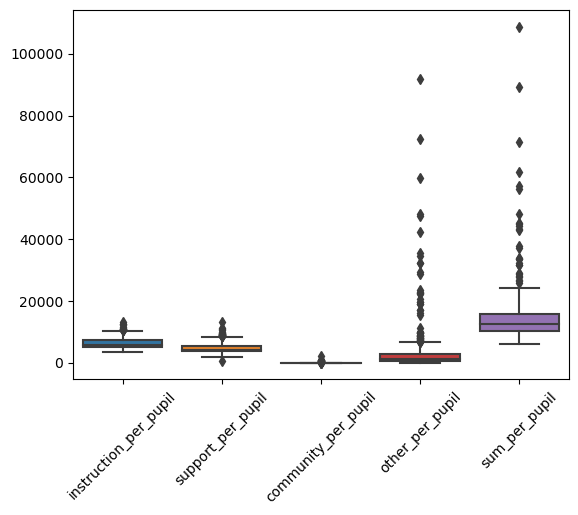

In [98]:
sns.boxplot(per_pupil_data.drop('year', axis=1))
plt.xticks(rotation=45);

Even in the per_pupil spending, there are huge outliers in other spending which is affecting the sum as well. Let's check to make sure that is not a mistake by determining if those outliers are equivalent to the total values

In [102]:
tall_expenditures[tall_expenditures['other_per_pupil'] == tall_expenditures['other_total']]

,district_name,county,instruction_total,support_total,community_total,other_total,sum_total,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil,year
18,PRITCHETT RE-3,BACA,674360,552710,0,0,1227070,10553.0,8650.0,0.0,0.0,19203.0,2010
21,CAMPO RE-6,BACA,514503,642737,16051,0,1173291,10543.0,13171.0,329.0,0.0,24043.0,2010
76,NORTH PARK R-1,JACKSON,1458972,1289280,10979,0,2759231,7421.0,6558.0,56.0,0.0,14035.0,2010
78,EADS RE-1,KIOWA,1278627,908047,0,0,2186674,7306.0,5189.0,0.0,0.0,12495.0,2010
96,BRANSON REORGANIZED 82,LAS ANIMAS,2136497,1270103,9720,0,3416320,4896.0,2910.0,22.0,0.0,7828.0,2010
97,KIM REORGANIZED 88,LAS ANIMAS,604028,541883,0,0,1145911,10597.0,9507.0,0.0,0.0,20104.0,2010
146,MOUNTAIN VALLEY RE 1,SAGUACHE,1193134,857468,0,0,2050602,9984.0,7175.0,0.0,0.0,17160.0,2010
160,LONE STAR 101,WASHINGTON,1030431,517597,0,0,1548028,9666.0,4856.0,0.0,0.0,14522.0,2010
172,PRAIRIE RE-11,WELD,1219619,979228,0,0,2198847,7365.0,5913.0,0.0,0.0,13278.0,2010
18,PRITCHETT RE-3,BACA,694331,609447,0,0,1303777,10332.0,9069.0,0.0,0.0,19401.0,2011


This is only true when the category is 0. Let's sort by other and find out what it looks like

In [103]:
tall_expenditures.sort_values(by='other_per_pupil', ascending=False).head(10)

,district_name,county,instruction_total,support_total,community_total,other_total,sum_total,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil,year
149,SILVERTON 1,SAN JUAN,730805,409292,0,6181429,7321526,10859.0,6082.0,0.0,91849.0,108789.0,2011
149,SILVERTON 1,SAN JUAN,702843,419046,0,4765361,5887250,10665.0,6359.0,0.0,72312.0,89336.0,2010
8,SANGRE DE CRISTO RE-22J,ALAMOSA,1801524,1692183,0,18232716,21726423,5922.0,5563.0,0.0,59937.0,71422.0,2010
128,PARK COUNTY RE-2,PARK,4183166,2808904,5306,25055432,32052809,8040.0,5399.0,10.0,48156.0,61604.0,2011
157,AKRON R-1,WASHINGTON,2187495,1476667,0,17504052,21168214,5915.0,3993.0,0.0,47334.0,57242.0,2011
98,GENOA-HUGO C-113,LINCOLN,1392693,865854,409,6830918,9089874,8640.0,5371.0,3.0,42375.0,56389.0,2012
148,CENTER 26 JT,SAGUACHE,3882536,3307372,125738,20526553,27842199,6693.0,5701.0,217.0,35385.0,47996.0,2011
58,HANOVER 28,EL PASO,1482289,1294630,0,8958674,11735593,5719.0,4995.0,0.0,34563.0,45276.0,2010
34,CENTENNIAL R-1,COSTILLA,1092926,1120145,60807,6884370,9158247,5138.0,5266.0,286.0,32367.0,43057.0,2012
34,CENTENNIAL R-1,COSTILLA,1191954,1312466,0,7494582,9999002,5144.0,5665.0,0.0,32346.0,43155.0,2010


There is definitely a massive imbalance other spending, and it doesn't always seem to be a districts that have the most money to spend

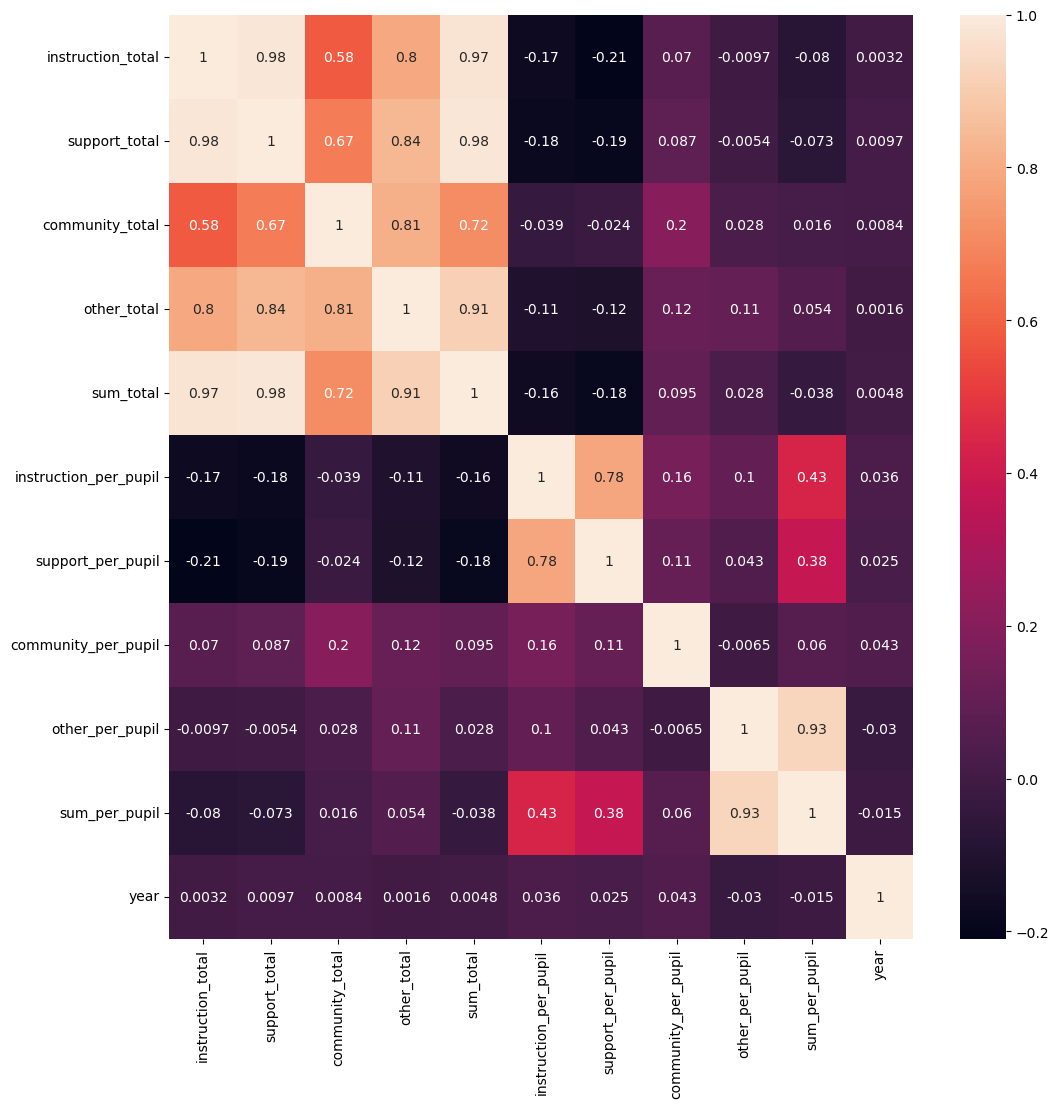

In [106]:
plt.figure(figsize=(12,12))
sns.heatmap(tall_expenditures.corr(numeric_only=True), annot=True)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'instruction_per_pupil'),
  Text(1, 0, 'support_per_pupil'),
  Text(2, 0, 'community_per_pupil'),
  Text(3, 0, 'other_per_pupil'),
  Text(4, 0, 'sum_per_pupil')])

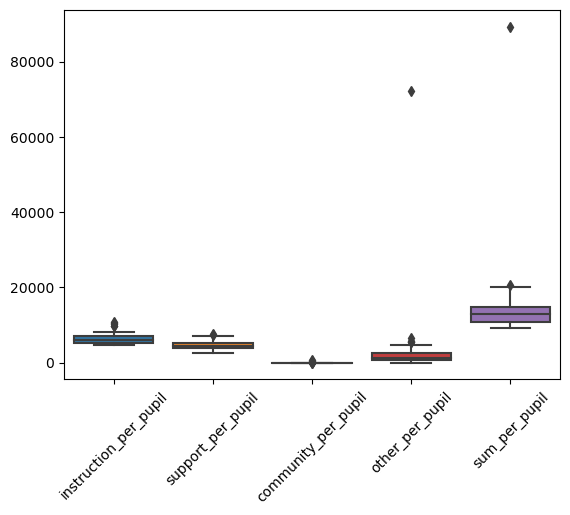

In [129]:
county_per_pupil = per_pupil_data.groupby('county').median(numeric_only=True).drop('year', axis=1)
sns.boxplot(county_per_pupil)
plt.xticks(rotation=45)

It looks like only county accounts for the outliers in spending.

In [120]:
# The county with the maximum spending ability
county_per_pupil['other_per_pupil'].idxmax()

'SAN JUAN'

In [125]:
per_pupil_data[per_pupil_data['county'] == 'SAN JUAN']

,district_name,county,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil,year
149,SILVERTON 1,SAN JUAN,10665.0,6359.0,0.0,72312.0,89336.0,2010
149,SILVERTON 1,SAN JUAN,10859.0,6082.0,0.0,91849.0,108789.0,2011
149,SILVERTON 1,SAN JUAN,13112.0,8775.0,2174.0,1642.0,25702.0,2012


San Juan county has the highest median spending, but Silverton 1 is the only district in the county. We have coincidentally capture a very interesting piece of data. San Juan's spending per pupil has decreased by about 70% in the past two years, and has changed dramatically

(array([0, 1, 2, 3]),
 [Text(0, 0, 'instruction_per_pupil'),
  Text(1, 0, 'support_per_pupil'),
  Text(2, 0, 'community_per_pupil'),
  Text(3, 0, 'other_per_pupil')])

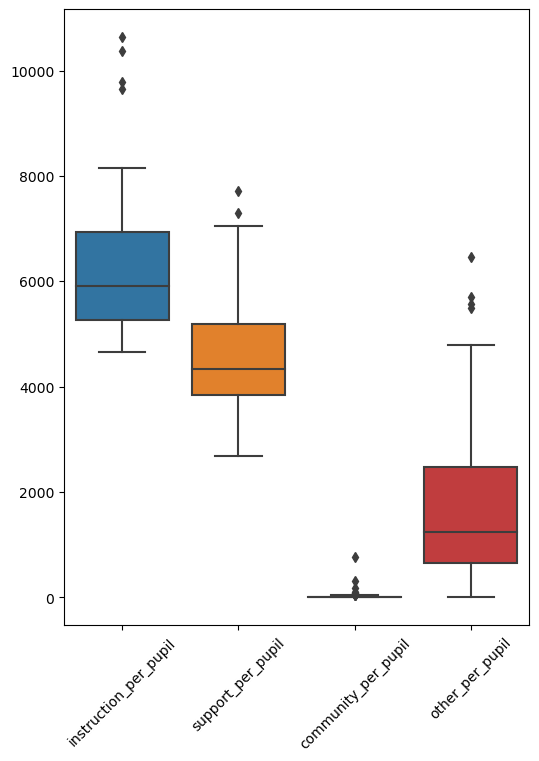

In [135]:
not_san_juan = county_per_pupil.drop('SAN JUAN')
plt.figure(figsize=(6,8))
sns.boxplot(not_san_juan.drop('sum_per_pupil', axis=1))
plt.xticks(rotation=45)

Because we noticed such a huge change in Silverton's spending, lets look at the distribution of the difference in spending

In [152]:
per_pupil_2010 = per_pupil_data.loc[per_pupil_data['year'] == 2010, ['district_name', 'county', 'sum_per_pupil']]
per_pupil_2012 = per_pupil_data.loc[per_pupil_data['year'] == 2012, ['district_name', 'county', 'sum_per_pupil']]
diff_per_pupil = pd.merge(per_pupil_2010, per_pupil_2012, on=('district_name', 'county'), suffixes=('_2010', '_2012'))
diff_per_pupil['difference'] = diff_per_pupil['sum_per_pupil_2012'] - diff_per_pupil['sum_per_pupil_2010']
diff_per_pupil.head()

,district_name,county,sum_per_pupil_2010,sum_per_pupil_2012,difference
0,MAPLETON 1,ADAMS,9653.0,9115.0,-538.0
1,ADAMS 12 FIVE STAR,ADAMS,10837.0,9538.0,-1299.0
2,ADAMS COUNTY 14,ADAMS,11104.0,22100.0,10996.0
3,BRIGHTON 27J,ADAMS,9287.0,9441.0,154.0
4,BENNETT 29J,ADAMS,8784.0,8895.0,111.0


In [154]:
diff_per_pupil.sort_values(by='difference', ascending=False).head(10)

,district_name,county,sum_per_pupil_2010,sum_per_pupil_2012,difference
98,GENOA-HUGO C-113,LINCOLN,14413.0,56389.0,41976.0
81,HI PLAINS R-23,KIT CARSON,15085.0,37764.0,22679.0
70,WEST GRAND 1-JT.,GRAND,12516.0,31576.0,19060.0
42,EAGLE COUNTY RE 50,EAGLE,15425.0,33700.0,18275.0
68,GARFIELD 16,GARFIELD,16077.0,28873.0,12796.0
2,ADAMS COUNTY 14,ADAMS,11104.0,22100.0,10996.0
175,WRAY RD-2,YUMA,10776.0,18712.0,7936.0
6,WESTMINSTER 50,ADAMS,12119.0,19472.0,7353.0
10,SHERIDAN 2,ARAPAHOE,15552.0,21727.0,6175.0
164,KEENESBURG RE-3(J),WELD,10682.0,16068.0,5386.0


In [157]:
diff_per_pupil.sort_values(by='difference', ascending=False).tail(10)

,district_name,county,sum_per_pupil_2010,sum_per_pupil_2012,difference
165,WINDSOR RE-4,WELD,15050.0,9805.0,-5245.0
54,MANITOU SPRINGS 14,EL PASO,15270.0,9780.0,-5490.0
157,AKRON R-1,WASHINGTON,17747.0,12032.0,-5715.0
12,LITTLETON 6,ARAPAHOE,16056.0,10319.0,-5737.0
24,ST VRAIN VALLEY RE 1J,BOULDER,16137.0,10208.0,-5929.0
72,GUNNISON WATERSHED RE1J,GUNNISON,17898.0,11748.0,-6150.0
128,PARK COUNTY RE-2,PARK,28923.0,16118.0,-12805.0
58,HANOVER 28,EL PASO,45276.0,16922.0,-28354.0
8,SANGRE DE CRISTO RE-22J,ALAMOSA,71422.0,12664.0,-58758.0
149,SILVERTON 1,SAN JUAN,89336.0,25702.0,-63634.0


<AxesSubplot: xlabel='difference', ylabel='Count'>

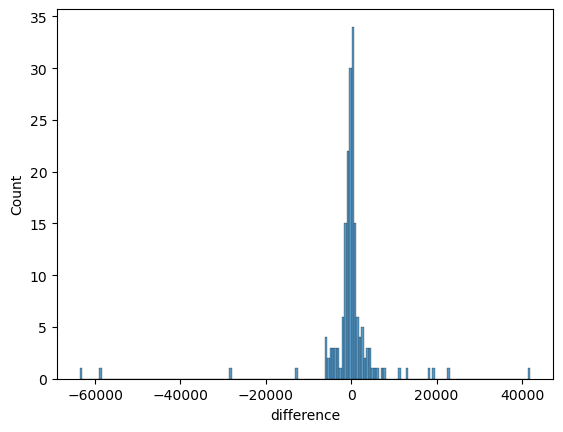

In [156]:
sns.histplot(diff_per_pupil['difference'])

We can clearly see that there is a pretty tight distribution centered around 0 with very extreme outliers

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'instruction_per_pupil'),
  Text(1, 0, 'support_per_pupil'),
  Text(2, 0, 'community_per_pupil'),
  Text(3, 0, 'other_per_pupil'),
  Text(4, 0, 'sum_per_pupil')])

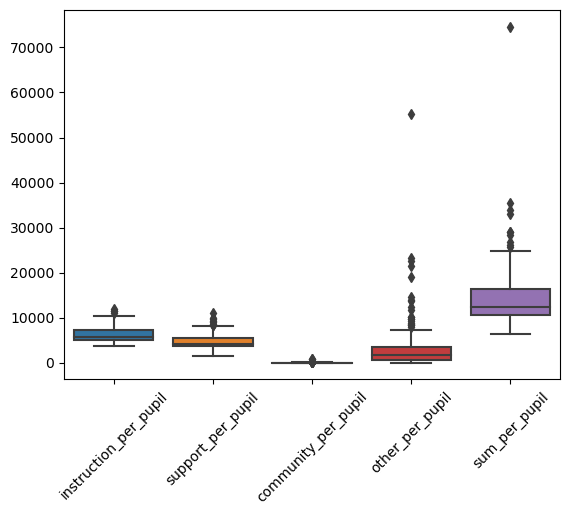

In [165]:
district_per_pupil = per_pupil_data.groupby('district_name').mean(numeric_only=True).drop('year', axis=1)
sns.boxplot(district_per_pupil)
plt.xticks(rotation=45)

In [166]:
district_per_pupil.sort_values('sum_per_pupil')

,instruction_per_pupil,support_per_pupil,community_per_pupil,other_per_pupil,sum_per_pupil
district_name,,,,,
JULESBURG RE-1,4876.666667,1391.333333,0.000000,181.666667,6450.000000
BRANSON REORGANIZED 82,4577.333333,2662.000000,28.333333,0.000000,7268.333333
VILAS RE-5,4307.000000,3422.666667,0.000000,43.000000,7773.000000
CHARTER SCHOOL INSTITUTE,3762.666667,3261.666667,11.000000,1212.666667,8247.666667
EATON RE-2,4636.333333,2865.333333,1.000000,856.666667,8359.333333
...,...,...,...,...,...
CHEYENNE COUNTY RE-5,9174.333333,7520.333333,0.666667,12348.666667,29044.000000
SANGRE DE CRISTO RE-22J,6123.666667,5427.666667,0.000000,21457.333333,33009.000000
CENTENNIAL R-1,5047.666667,5547.666667,95.333333,23186.333333,33876.666667


In [174]:
district_names_census = set(census_10['district_name'].str.upper().str.replace('SCHOOL ', '').str.replace('DISTRICT ', ''))

district_names_census ^ district_names_2010

{'ADAMS 12 FIVE STAR',
 'ARCHULETA COUNTY 50 JT',
 'ARCHULETA COUNTY 50-JT',
 'BAYFIELD 10 JT-R',
 'BAYFIELD R-10-JT',
 'BENNETT 29-J',
 'BENNETT 29J',
 'BOULDER VALLEY RE 2',
 'BOULDER VALLEY RE-2',
 'BRUSH RE-2(J)',
 'BRUSH RE-2J',
 'CANON CITY RE-1',
 'CAÑON CITY RE-1',
 'CENTER 26 JT',
 'CENTER 26-JT',
 'CHARTER SCHOOL INSTITUTE',
 'CONSOLIDATED C-1',
 'CUSTER COUNTY C-1',
 'DE BEQUE 49-JT',
 'DE BEQUE 49JT',
 'DELTA COUNTY 50(J)',
 'DELTA COUNTY 50J',
 'DOLORES COUNTY RE NO.2',
 'DOLORES COUNTY RE-2',
 'DOUGLAS COUNTY RE 1',
 'DOUGLAS COUNTY RE-1',
 'EDISON 54 JT',
 'EDISON 54-JT',
 'GARFIELD 16',
 'GARFIELD COUNTY 16',
 'GUNNISON WATERSHED RE-1J',
 'GUNNISON WATERSHED RE1J',
 'HI PLAINS R-23',
 'HI-PLAINS R-23',
 'HINSDALE COUNTY RE 1',
 'HINSDALE COUNTY RE-1',
 'IGNACIO 11 JT',
 'IGNACIO 11-JT',
 'JOHNSTOWN-MILIKEN RE-5J',
 'JOHNSTOWN-MILLIKEN RE-5J',
 'KEENESBURG RE-3(J)',
 'KEENESBURG RE-3J',
 'MIAMI-YODER 60-JT',
 'MIAMI/YODER 60 JT',
 'MOFFAT 2',
 'MOFFAT CONSOLIDATED 2',
 '